# CNN (CIFAR-10)

In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
K = len(set(y_train.flatten()))

Epoch 1/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4946 - accuracy: 0.4576 - val_loss: 1.2763 - val_accuracy: 0.5362
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1639 - accuracy: 0.5848 - val_loss: 1.1267 - val_accuracy: 0.5998
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0018 - accuracy: 0.6461 - val_loss: 0.9768 - val_accuracy: 0.6546
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8842 - accuracy: 0.6861 - val_loss: 0.9318 - val_accuracy: 0.6791
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7814 - accuracy: 0.7248 - val_loss: 0.9208 - val_accuracy: 0.6801
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6781 - accuracy: 0.7580 - val_loss: 0.9106 - val_accuracy: 0.6861
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6002 - accuracy: 0.7869 - val_loss: 0.9079 - val_accuracy:

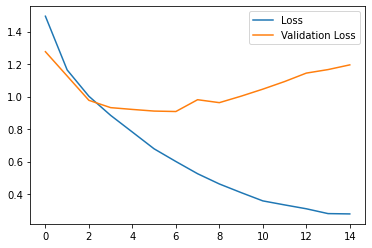

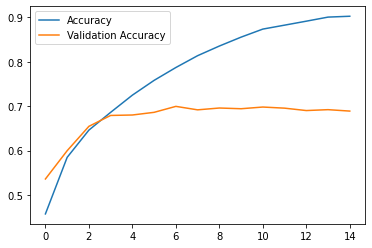

313/313 [==============================] - 0s 1ms/step - loss: 1.1952 - accuracy: 0.6889
Accuracy: 0.6888999938964844


In [4]:
i = tf.keras.layers.Input(shape=X_train[0].shape)
x = tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=15)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

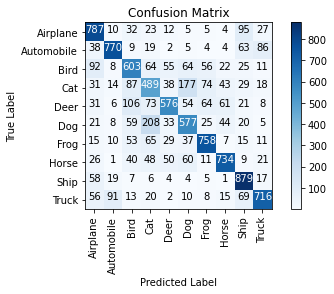

In [5]:
def plot_confusion_matrix(cm, labels):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    num_classes = len(labels)
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    
    threshold = cm.max() / 2
    for i, j in itertools.product(range(num_classes), range(num_classes)):
        plt.text(j, i, cm[i, j],
                 ha='center',
                 color='white' if cm[i, j] > threshold else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


labels = [
    'Airplane', 
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck',
]

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, labels)

## Display a random misclassified image

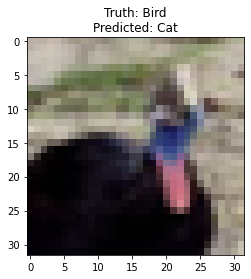

In [6]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title(f'Truth: {labels[y_test[i]]}\nPredicted: {labels[p_test[i]]}')
plt.show()